In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import random

# Passeio Aleatório

In [70]:
t = np.arange(0,20,0.001)
n = len(t)
print(n)

20000


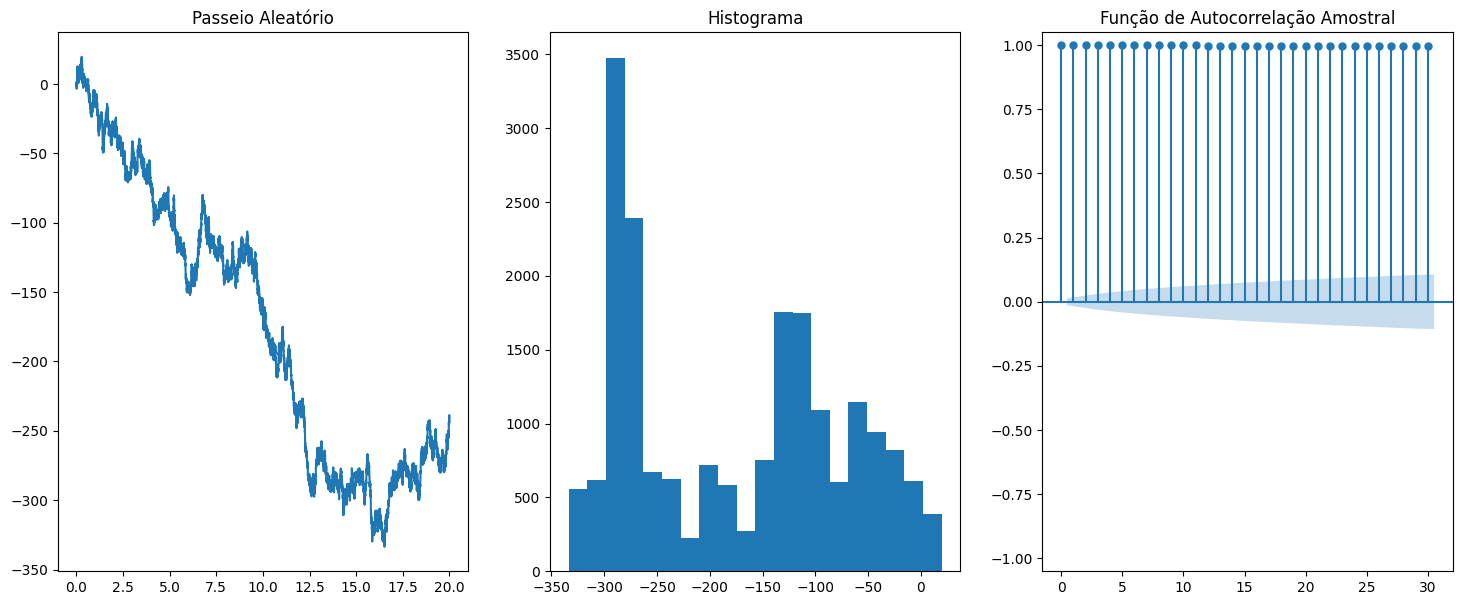

In [71]:
ZtPA = np.zeros((n,1))

for i in range(1,n):
  ZtPA[i] = ZtPA[i - 1] + random.gauss(0,1)


plt.figure(figsize = (18,7))

plt.subplot(1,3,1)
plt.plot(t, ZtPA)
plt.title('Passeio Aleatório')

plt.subplot(1,3,2)
plt.hist(ZtPA, bins = 20)
plt.title('Histograma')

ax3 = plt.subplot(1,3,3)
plot_acf(ZtPA, lags = 30, title = 'Função de Autocorrelação Amostral', alpha = 0.05, ax = ax3)
plt.ylim(ymin=-1.05,ymax=1.05)

plt.show()

# Processo Autoregressivo de Ordem 1 AR(1)

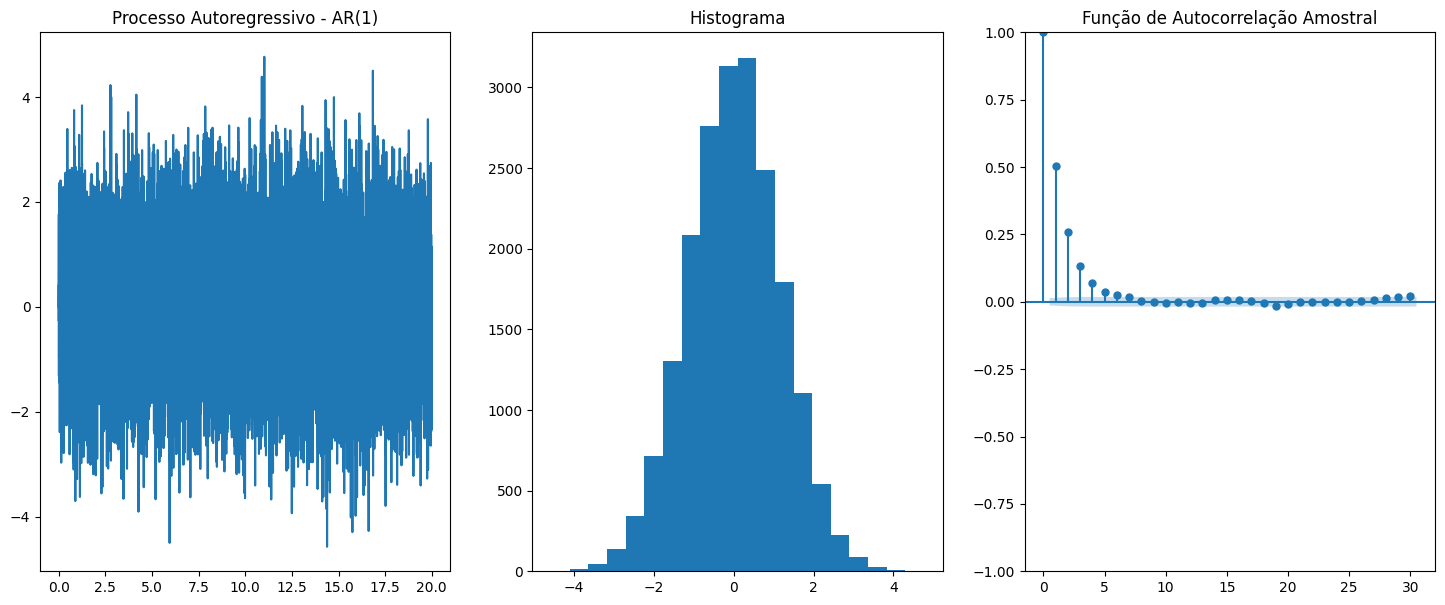

In [72]:
ZtAR = np.zeros((n,1))

phi = 0.5

for i in range(1,n):
  ZtAR[i] = phi * ZtAR[i - 1] + random.gauss(0,1)


plt.figure(figsize = (18,7))


plt.subplot(1,3,1)
plt.plot(t, ZtAR)
plt.title('Processo Autoregressivo - AR(1)')

plt.subplot(1,3,2)
plt.hist(ZtAR, bins = 20)
plt.title('Histograma')

ax3 = plt.subplot(1,3,3)
plot_acf(ZtAR, lags = 30, title = 'Função de Autocorrelação Amostral', alpha = 0.05, ax = ax3)

plt.show()

# Processos de Médias Móveis - MA (1)

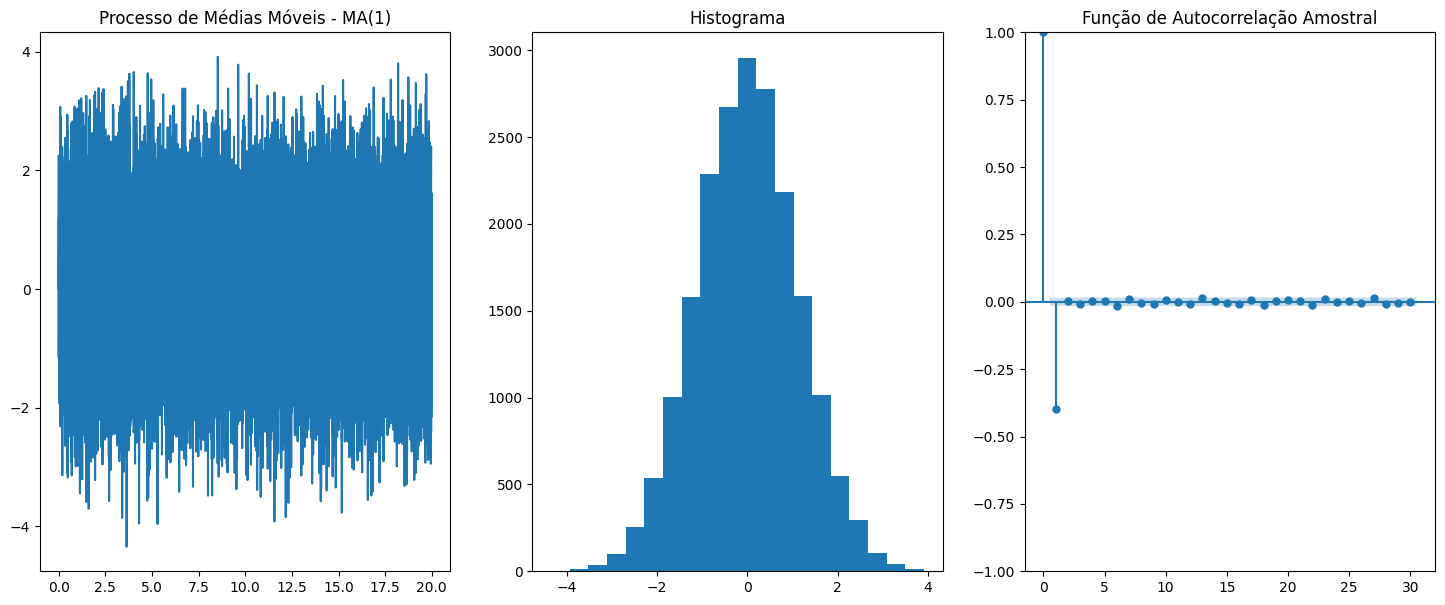

In [73]:
ZtMA = np.zeros((n,1))
at = np.zeros((n,1))

theta = 0.5

for i in range(n):
  at[i] = random.gauss(0,1)

for i in range(1,n):
  ZtMA[i] = at[i] - theta * at[i - 1]


plt.figure(figsize = (18,7))

plt.subplot(1,3,1)
plt.plot(t, ZtMA)
plt.title('Processo de Médias Móveis - MA(1)')

plt.subplot(1,3,2)
plt.hist(ZtMA, bins = 20)
plt.title('Histograma')

ax3 = plt.subplot(1,3,3)
plot_acf(ZtMA, lags = 30, title = 'Função de Autocorrelação Amostral', alpha = 0.05, ax = ax3)

plt.show()

# Testes para Estacionariedade

In [75]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [76]:
nsamples = len(ZtPA)
results = adfuller(ZtPA)
print()
print(f'Número de amostras: {nsamples}')
print(f'   Estatística ADF: `{results[0]}')
print(f'           p-value: {results[1]}')
print(f'    Número de Lags: {results[2]}')
print()

for key, value in results[4].items():
  print('Valores Críticos:')
  print(f'  {key}: {value}')

print()
print(f'Resultado: A série temporal é {"não" if results[1] >= 0.05 else ""} estacionária.')
print()


Número de amostras: 20000
   Estatística ADF: `-1.612854146828971
           p-value: 0.4764775259221392
    Número de Lags: 1

Valores Críticos:
  1%: -3.430677039683096
Valores Críticos:
  5%: -2.8616845400450694
Valores Críticos:
  10%: -2.566846934716674

Resultado: A série temporal é não estacionária.



In [77]:
nsamples = len(ZtPA)
resultKPSS,p_value,n_lags,critical_values = kpss(ZtPA,regression='ct')
print()
print(f'Número de amostras: {nsamples}')
print(f'  Estatística KPSS: {resultKPSS}')
print(f'           p-value: {p_value}')
print(f'    Número de Lags: {n_lags}')
print()

for key, value in critical_values.items():
  print('Valores Críticos:')
  print(f'  {key}: {value}')

print()
print(f'Resultado: A série temporal é {"não" if p_value < 0.05 else ""} estacionária.')
print()


Número de amostras: 20000
  Estatística KPSS: 2.1894386761577453
           p-value: 0.01
    Número de Lags: 87

Valores Críticos:
  10%: 0.119
Valores Críticos:
  5%: 0.146
Valores Críticos:
  2.5%: 0.176
Valores Críticos:
  1%: 0.216

Resultado: A série temporal é não estacionária.



<ipython-input-77-f39f6f354cb4>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  resultKPSS,p_value,n_lags,critical_values = kpss(ZtPA,regression='ct')


# Diferenciação da Série - Detrending

In [78]:
serie = pd.DataFrame(index = t , data = ZtPA)
serie.columns = ['serie']

In [79]:
serie_diff = serie - serie.shift(1)

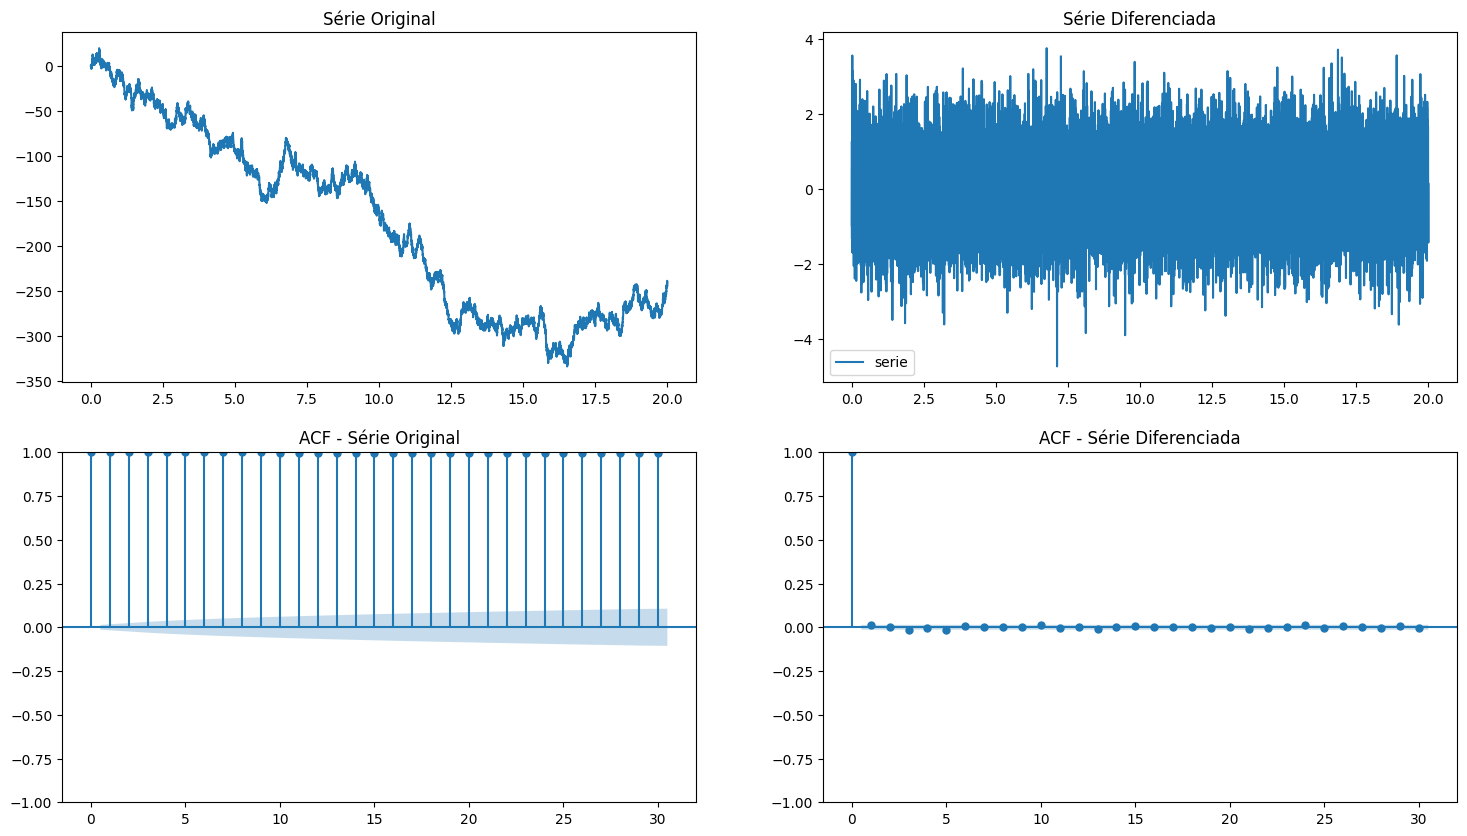

In [80]:
plt.figure(figsize = (18,10))
plt.subplot(2,2,1)
plt.plot(t, ZtPA)
plt.title('Série Original')

ax = plt.subplot(2,2,2)
serie_diff.plot(title='Série Diferenciada', ax = ax)

ax2 = plt.subplot(2,2,3)
plot_acf(ZtPA, lags = 30, title = 'ACF - Série Original', alpha = 0.05, ax = ax2)

ax3 = plt.subplot(2,2,4)
plot_acf(serie_diff['serie'].dropna(), lags = 30, title = 'ACF - Série Diferenciada', alpha = 0.05, ax = ax3)

plt.show()

In [81]:
print('SÉRIE ORIGINAL')
nsamples = len(ZtPA)
results = adfuller(ZtPA)
print()
print(f'Número de amostras: {nsamples}')
print(f'   Estatística ADF: `{results[0]}')
print(f'           p-value: {results[1]}')
print(f'    Número de Lags: {results[2]}')
print()

for key, value in results[4].items():
  print('Valores Críticos:')
  print(f'  {key}: {value}')

print()
print(f'Resultado: A série temporal é {"não " if results[1] >= 0.05 else ""}estacionária.')
print()

SÉRIE ORIGINAL

Número de amostras: 20000
   Estatística ADF: `-1.612854146828971
           p-value: 0.4764775259221392
    Número de Lags: 1

Valores Críticos:
  1%: -3.430677039683096
Valores Críticos:
  5%: -2.8616845400450694
Valores Críticos:
  10%: -2.566846934716674

Resultado: A série temporal é não estacionária.



In [82]:
print('SÉRIE DIFERNECIADA')
nsamples = len(serie_diff)
results = adfuller(serie_diff['serie'].dropna())
print()
print(f'Número de amostras: {nsamples}')
print(f'   Estatística ADF: `{results[0]}')
print(f'           p-value: {results[1]}')
print(f'    Número de Lags: {results[2]}')
print()


for key, value in results[4].items():
  print('Valores Críticos:')
  print(f'  {key}: {value}')

print()
print(f'Resultado: A série temporal é {"não " if results[1] >= 0.05 else ""}estacionária.')
print()

SÉRIE DIFERNECIADA

Número de amostras: 20000
   Estatística ADF: `-139.34697545975072
           p-value: 0.0
    Número de Lags: 0

Valores Críticos:
  1%: -3.430677039683096
Valores Críticos:
  5%: -2.8616845400450694
Valores Críticos:
  10%: -2.566846934716674

Resultado: A série temporal é estacionária.

